This notebook utilizes SMS Spam Detection data that processed at first. Due to the initial data being unbalanced, it was balanced using appropriate techniques. Subsequently, 5 machine learning models (XGB, LR, SVC, RF, KNN) were established and evaluated using various model evaluation metrics. The results of these evaluations are presented in the provided **table**


In [1]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns       # For data visualization

import warnings
warnings.filterwarnings('ignore')

# handling imbalanced datasets and performing resampling techniques
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('/content/spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.rename(columns = {'v1': 'target', 'v2': 'Message'}, inplace = True)

In [6]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['target'] = en.fit_transform(data['target'])

In [7]:
data.head()

,target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 0 --> Not Spam

# 1 --> Spam

In [8]:
data.duplicated().sum()

403

In [9]:
data = data.drop_duplicates(keep = 'first')

In [10]:
data.shape

(5169, 2)

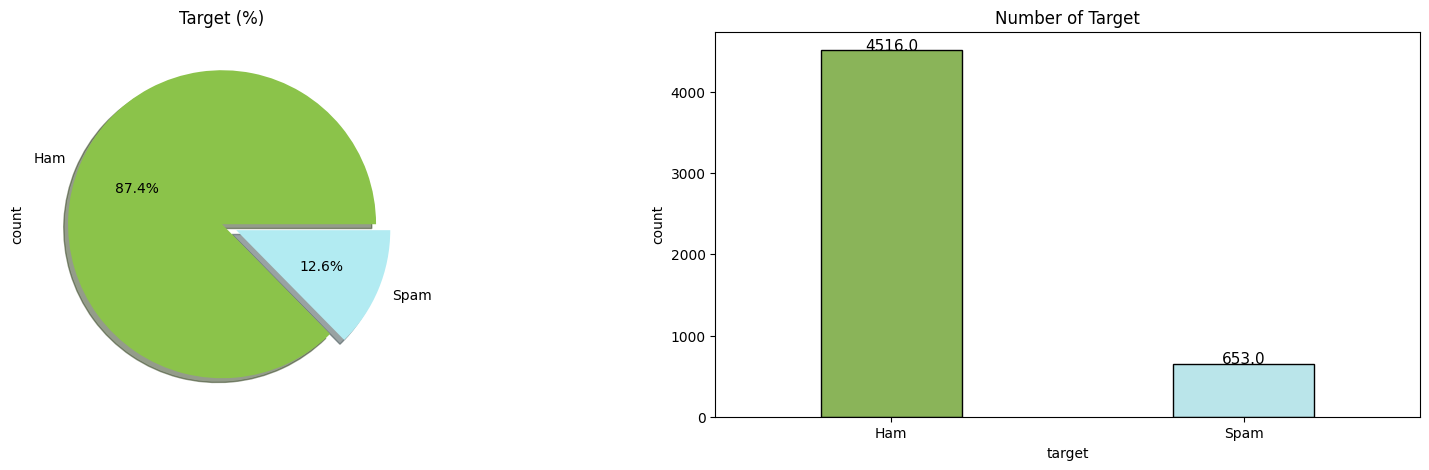

In [11]:
l = data['target'].value_counts()
colors = ['#8BC34A','#B2EBF2']

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['Ham', 'Spam'], colors=colors)
plt.title('Target (%)')


plt.subplot(1,2,2)
ax = sns.countplot(x='target',data = data, palette = colors,edgecolor = 'black', width=0.4)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Ham', 'Spam'])
plt.title('Number of Target')
plt.show()


In [12]:
x = data['Message']
y = data['target']

In [13]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

x_extraction = feature_extraction.fit_transform(x)

In [14]:
print(x_extraction)

  (0, 8026)	0.19575229718355341
  (0, 1051)	0.349887876326219
  (0, 3494)	0.1638521896261678
  (0, 1994)	0.2951265280780472
  (0, 1701)	0.3338712087191626
  (0, 4349)	0.2951265280780472
  (0, 8227)	0.2470765252568781
  (0, 3534)	0.195355289190792
  (0, 1703)	0.2951265280780472
  (0, 1271)	0.265351062399719
  (0, 2271)	0.2702952522134921
  (0, 5741)	0.2730206060547111
  (0, 4224)	0.349887876326219
  (1, 5369)	0.5464988818914979
  (1, 8134)	0.4304438402468376
  (1, 4192)	0.5233434480300876
  (1, 4385)	0.406925248497845
  (1, 5343)	0.2767319100209511
  (2, 77)	0.23979791195963693
  (2, 1128)	0.16835091112431685
  (2, 6062)	0.16835091112431685
  (2, 7701)	0.12497279140116638
  (2, 7028)	0.20226686886123935
  (2, 6010)	0.17884885821587568
  (2, 6115)	0.16559535588730967
  :	:
  (5164, 5118)	0.24570931529408643
  (5164, 8202)	0.19327861567713003
  (5164, 2000)	0.18810007025693273
  (5164, 5894)	0.1966666491247667
  (5164, 6062)	0.2330967022586123
  (5165, 2907)	0.6008827847681286
  (5165, 32

In [15]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.4)
f1 = x_extraction
t1 = y

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 1632, 1: 1632})

In [16]:
# data splitting, model evaluation metrics, cross-validation, hyperparameter tuning, and classification performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


# necessary classifiers for building machine learning models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [17]:
# Splitting the resampled data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3, random_state=101)

In [18]:
# Defining a function to train and evaluate a machine learning classifier model

def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))



# Defining a function to evaluate the performance of a machine learning classifier model
def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))





# Defining a function to plot the Receiver Operating Characteristic (ROC) curve
def plot_roc_curve(y_true, y_scores):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [19]:
# Initializing an XGBoost classifier with specific hyperparameters

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  98.48%
ROC_AUC Score :  94.40%
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       504
           1       0.97      0.91      0.94       476

    accuracy                           0.94       980
   macro avg       0.95      0.94      0.94       980
weighted avg       0.95      0.94      0.94       980



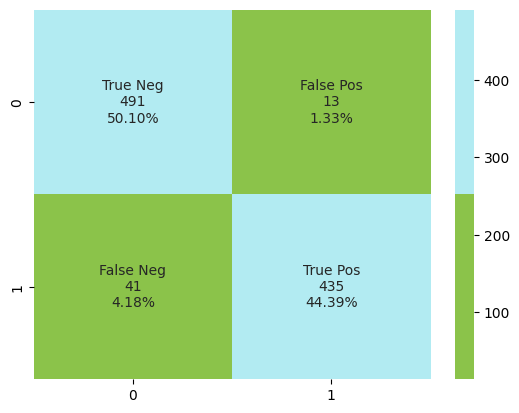

In [20]:
# Training, evaluating, and evaluating the performance of an XGBoost classifier model

model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

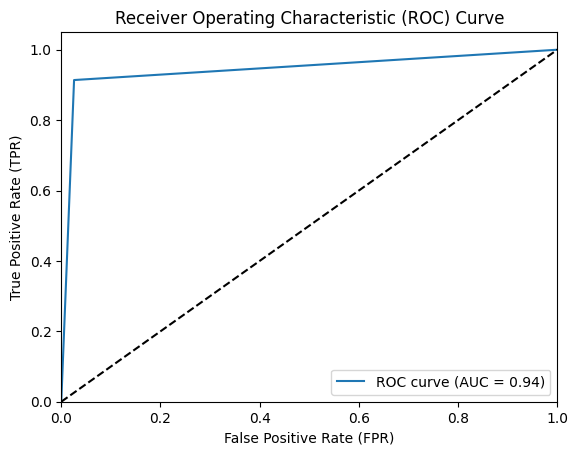

In [21]:
# Making predictions using the XGBoost classifier and plotting the ROC curve

prediction_xgb = classifier_xgb.predict(x_test)
plot_roc_curve(y_test, prediction_xgb)

In [22]:
# Initializing a Logistic Regression classifier with specific hyperparameters

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Cross Validation Score :  99.71%
ROC_AUC Score :  97.44%
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       504
           1       0.98      0.97      0.97       476

    accuracy                           0.97       980
   macro avg       0.97      0.97      0.97       980
weighted avg       0.97      0.97      0.97       980



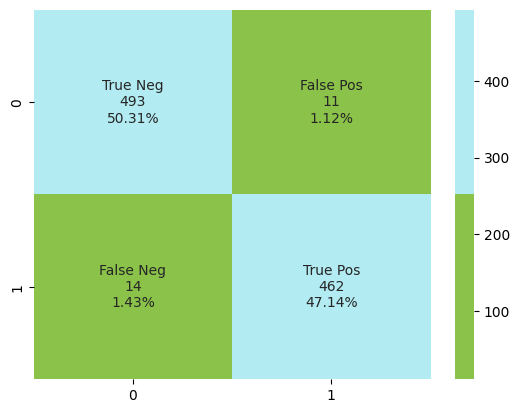

In [23]:
# Training, evaluating, and evaluating the performance of a Logistic Regression classifier model

model(classifier_lr,x_train,y_train,x_test,y_test)
model_evaluation(classifier_lr,x_test,y_test)

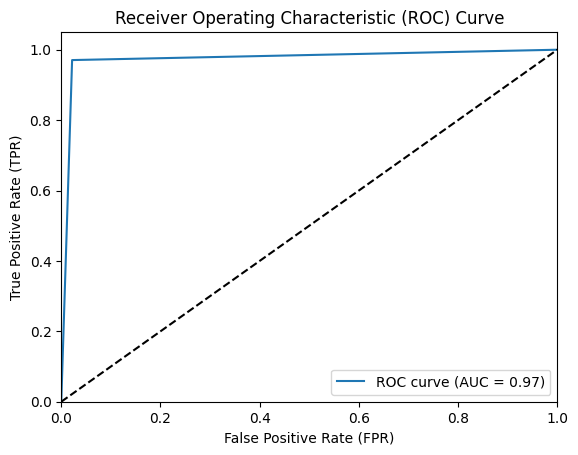

In [24]:
# Making predictions using the Logistic Regression classifier and plotting the ROC curve

prediction_lr = classifier_lr.predict(x_test)
plot_roc_curve(y_test, prediction_lr)

In [25]:
# Initializing a Support Vector Classifier (SVC) with specific hyperparameters

classifier_svc = SVC(kernel = 'linear',C = 0.1)

Cross Validation Score :  99.38%
ROC_AUC Score :  93.44%
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       504
           1       0.98      0.89      0.93       476

    accuracy                           0.94       980
   macro avg       0.94      0.93      0.94       980
weighted avg       0.94      0.94      0.94       980



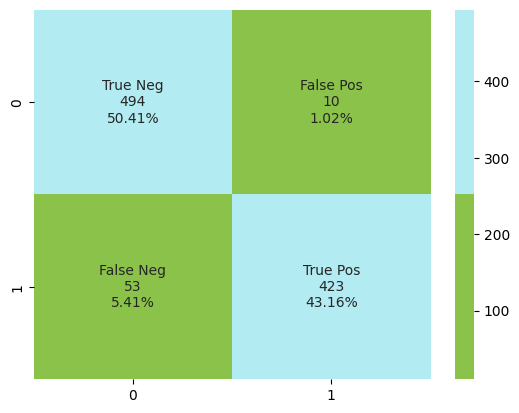

In [26]:
# Training, evaluating, and evaluating the performance of a Support Vector Classifier (SVC) model

model(classifier_svc,x_train,y_train,x_test,y_test)
model_evaluation(classifier_svc,x_test,y_test)

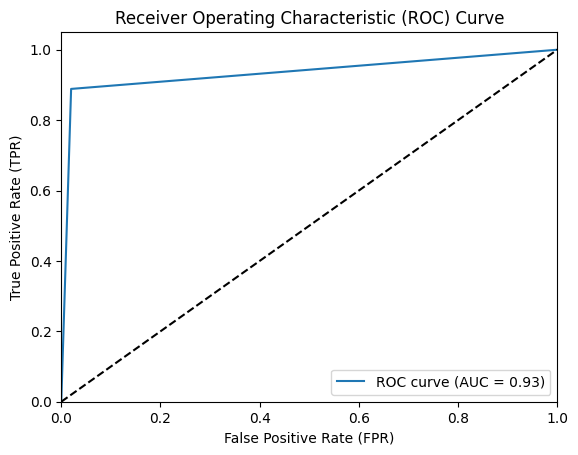

In [27]:
prediction_svc = classifier_svc.predict(x_test)
plot_roc_curve(y_test, prediction_svc)

In [28]:
# Initializing a Random Forest Classifier with specific hyperparameters

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  98.88%
ROC_AUC Score :  91.61%
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       504
           1       0.99      0.84      0.91       476

    accuracy                           0.92       980
   macro avg       0.93      0.92      0.92       980
weighted avg       0.93      0.92      0.92       980



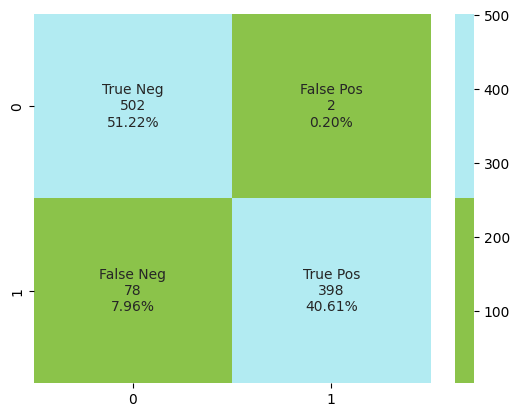

In [29]:
# Training, evaluating, and evaluating the performance of a Random Forest Classifier model

model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

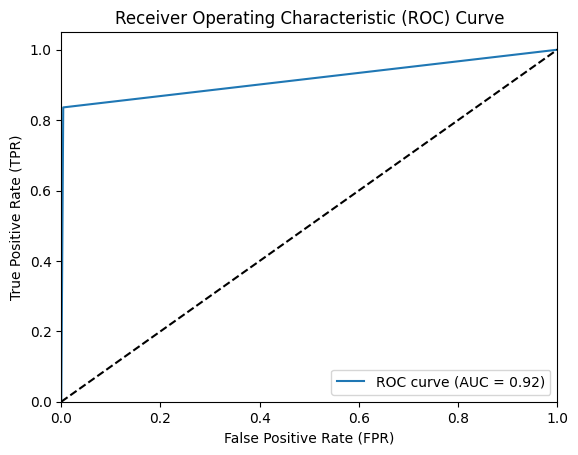

In [30]:
# Making predictions using the Random Forest Classifier and plotting the ROC curve

prediction_rf = classifier_rf.predict(x_test)
plot_roc_curve(y_test, prediction_rf)

In [31]:
# Initializing a K-Nearest Neighbors Classifier with specific hyperparameters

classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Cross Validation Score :  95.20%
ROC_AUC Score :  88.34%
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       504
           1       1.00      0.77      0.87       476

    accuracy                           0.89       980
   macro avg       0.91      0.88      0.88       980
weighted avg       0.91      0.89      0.88       980



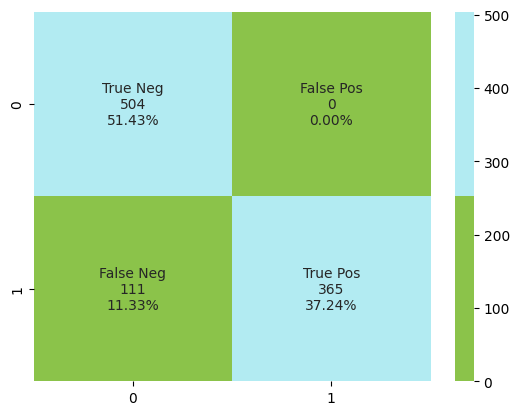

In [32]:
# Training, evaluating, and evaluating the performance of a K-Nearest Neighbors (KNN) Classifier model

model(classifier_knn,x_train,y_train,x_test,y_test)
model_evaluation(classifier_knn,x_test,y_test)

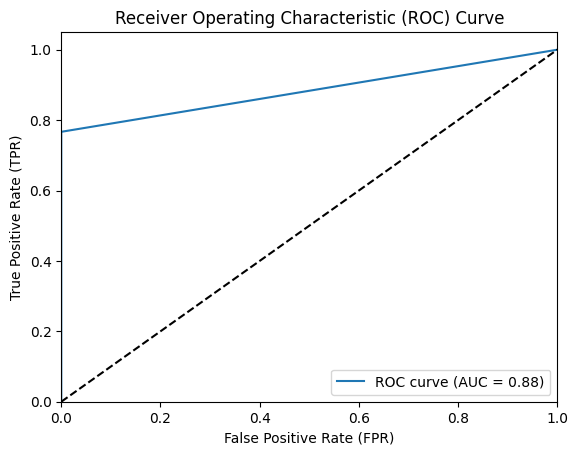

In [33]:
# Making predictions using the K-Nearest Neighbors (KNN) Classifier and plotting the ROC curve

prediction_knn = classifier_knn.predict(x_test)
plot_roc_curve(y_test, prediction_knn)